# Mejoras al Perceptrón

# Imports

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# Perceptrón simple

En el primer notebook, cubrimos el entrenamiento y clasificación de un perceptrón simple. 

In [81]:
def step(x):
    if x<0:
        return 0
    return 1

trainingData = [
    #([input values], expected classes)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.5

w = [0,0]
b = 0

while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        x, di = trainingData[i]
        yi = x[0] * w[0] + x[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(x)
        b = b + learningRate * error

        print("inputs: ", x, "\tweights:\t", w, "\tbias:\t", b)
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        break;

inputs:  [0, 0] 	weights:	 [ 0.  0.] 	bias:	 -0.5
inputs:  [0, 1] 	weights:	 [ 0.   0.5] 	bias:	 0.0
inputs:  [1, 0] 	weights:	 [ 0.   0.5] 	bias:	 0.0
inputs:  [1, 1] 	weights:	 [ 0.   0.5] 	bias:	 0.0
inputs:  [0, 0] 	weights:	 [ 0.   0.5] 	bias:	 -0.5
inputs:  [0, 1] 	weights:	 [ 0.   0.5] 	bias:	 -0.5
inputs:  [1, 0] 	weights:	 [ 0.5  0.5] 	bias:	 0.0
inputs:  [1, 1] 	weights:	 [ 0.5  0.5] 	bias:	 0.0
inputs:  [0, 0] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [0, 1] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [1, 0] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [1, 1] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [0, 0] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [0, 1] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [1, 0] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
inputs:  [1, 1] 	weights:	 [ 0.5  0.5] 	bias:	 -0.5
Success!


# Plots

Posteriormente revisamos como plotear los puntos de entrada del perceptrón y la recta que divide las clases.

In [82]:
def plotPerceptron():
    # Puntos:
    inputs = [i[0] for i in trainingData]
    colors = [i[1] for i in trainingData]
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    minX, maxX = np.array(x).min() - .1, np.array(x).max() + .1
    minY, maxY = np.array(y).min() - .1, np.array(y).max() + .1

    plt.ylim(minY, maxY)
    plt.xlim(minX, maxX)
    plt.scatter(x, y, c=colors, cmap="bwr")

    w1, w2 = w
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = np.array([-1, x+1])
    line_y_coords = c * line_x_coords + d

    plt.plot(line_x_coords, line_y_coords)
    plt.show()

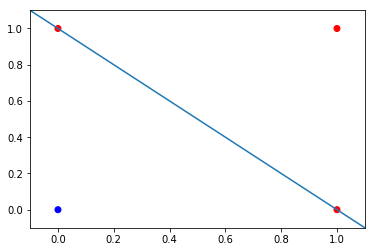

In [83]:
plotPerceptron()

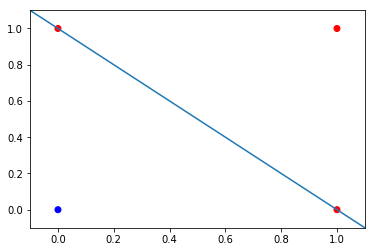

In [85]:
plot2DPerceptron([i[0] for i in trainingData], [i[1] for i in trainingData], w, b) 

# Mejoras

En este notebook le haremos unas mejoras a nuestro código del perceptrón.

## Random weights

Los pesos anteriormente partieron en cero. <br>
Esto implica que siempre que se entrene este sistema con los mismos valores de entrada, se llegará al mismo resultado. <br>
Esto puede ser negativo en algunos casos y se recomienda iniciar los pesos con valores random:

`w = random.rand(2)`

`b = random.random()`

In [11]:
w = np.random.rand(2)
b = random.random()

print("weights:\t\t", w)
print("bias:\t\t\t", b)

weights:		 [ 0.17336202  0.24708112]
bias:			 0.8591689342595242


## Producto Punto

En vez de realizar la multiplicación de las variables de entrada por los pesos de forma manual:

`yi = xi[0] * w[0] + xi[1] * w[1] + b`
    
Se hará el producto punto:

`yi = np.dot(w, x) + b`

In [16]:
# Valores ejemplo
x = [0, 1]
w = np.random.rand(2)

# Calculo de forma explícita:
yi = x[0] * w[0] + x[1] * w[1] + b

# Calculo con producto punto:
yi = np.dot(w, x) + b

print("math yi:\t\t", yi)
print("dot yi:\t\t\t", yi)

math yi:		 1.61065429291
dot yi:			 1.61065429291


# Step

La función que hemos utilizado funciona de forma perfecta.

Únicamente para reducir el tamaño del código, la reemplazaremos por la siguiente función.

In [12]:
step = lambda x: 0 if x < 0 else 1

# Random inputs

Anteriormente hemos iterado por cada una de las entradas.

Un problema de esto, es que, para el caso de la función OR, ninguno de los 3 primeros valores genera ningún cambio.

Una forma de hacer más general el proceso, es acceder a los valores de entrada de forma aleatorio. 

Podemos hacer lo anterior con un `i` tomado al azar:

In [14]:
i = random.randrange(0,len(trainingData))    

# Numero de iteraciones

En nuestros ejemplos anteriores, entrenamos hasta que el perceptrón aprendió a clasificar de forma correcta. 

Un problema de lo anterior, podría ser que no es posible separar de forma lineal un problema. 

Un ejemplo de lo anterior es la función `XOR`.

Reemplazaremos:

```python
while True:
...
    if(no changes in weights):
    break;
```

Por:
```python
for i in range(niters):
    ...
```

# Refactor

## Train Perceptron

In [78]:
def trainPerceptron(trainingData, expected, learningRate, niters):
    
    step = lambda x: 0 if x < 0 else 1
    
    w = np.random.rand(len(trainingData[0]))
    b = random.random()
    
    print("weights:\t", w, "\tbias:\t", b)

    for n in range(niters):
        old_w = w
        old_b = b

        i = random.randrange(0,len(trainingData)) 
        x = trainingData[i]
        di = expected[i]
        yi = np.dot(w, x) + b
        error = di - step(yi)
        w += learningRate * error * np.array(x)
        b += learningRate * error

    print("weights:\t", w, "\tbias:\t", b)
    plot2DPerceptron(trainingData, expected, w, b)        

## Plot 2D Perceptron

In [21]:
def plot2DPerceptron(trainingData, expected, weights, bias):
    # Puntos:
    inputs = trainingData
    colors = expected
    
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    minX, maxX = np.array(x).min() - .1, np.array(x).max() + .1
    minY, maxY = np.array(y).min() - .1, np.array(y).max() + .1

    plt.ylim(minY, maxY)
    plt.xlim(minX, maxX)
    plt.scatter(x, y, c=colors, cmap="bwr")

    w1, w2 = weights
    x = -bias / w1
    y = -bias / w2

    d = y
    c = -y / x

    line_x_coords = np.array([-1, x+1])
    line_y_coords = c * line_x_coords + d

    plt.plot(line_x_coords, line_y_coords)
    plt.show()

## Test

In [189]:
trainingData = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])

expected = np.array([
    0,
    1,
    1,
    1,
])
learningRate = 0.2
niters = 100

weights:	 [ 0.12669814  0.50777079] 	bias:	 0.7503208401207069
weights:	 [ 0.12669814  0.50777079] 	bias:	 -0.0496791598793


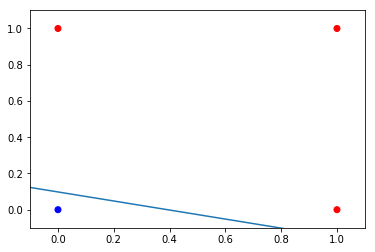

In [190]:
trainPerceptron(trainingData, expected, learningRate, niters)

weights:	 [ 0.23545527  0.43239624] 	bias:	 0.4497964050555465
weights:	 [ 0.23545527  0.43239624] 	bias:	 -0.150203594944


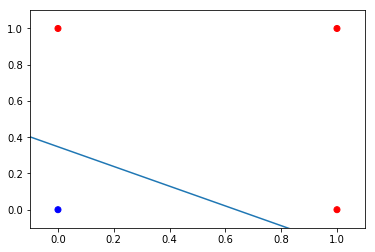

In [191]:
trainPerceptron(trainingData, expected, learningRate, niters)

In [10]:
learningRate = 0.2

## inputs.csv

In [ ]:
!cat inputs.csv

## read csv

In [ ]:
inputs = np.genfromtxt('inputs.csv', delimiter=',')
print(inputs)

## input values

In [ ]:
input = inputs[:,0:-1]
print(input)

## target values

In [ ]:
target = inputs[:,-1:]
print(target)

## add bias

In [ ]:
bias = np.ones((len(input),1))
print(bias)
print()
input = np.concatenate( (input, bias), axis=1 )
print(input)

## weights

In [ ]:
w = np.random.rand(3)
print(w)

## random values from input

In [ ]:
i = random.randrange(0,len(input))    
x, expected = input[i], target[i]
print(x, expected)

## dot product
En vez de hacer todas las operaciones a mano para cada uno de los inputs, hacerlo directamente para todo el vector. Para esto requerimos el bias dentro del input.

In [ ]:
result = np.dot(w, x)
print(result)

## función de activación

In [ ]:
def step(vector):
    cp = np.where(vector > 0, 1, 0)
    return cp

## error

In [ ]:
error = expected - step(result)
print(error)

## actualizar pesos

In [ ]:
w += learningRate * error * x
print(w)

## Refactor

In [ ]:
def perceptron(inputfile = "inputs.csv", learning_rate = 0.2, num_iters = 20):
    inputs = np.genfromtxt(inputfile, delimiter=',')
    input = inputs[:,0:-1]
    target = inputs[:,-1:]
    bias = np.ones((len(input),1))
    input = np.concatenate( (input, bias), axis=1 )
    w = np.random.rand(3)
    for i in range(num_iters):
        i = random.randrange(0,len(input))    
        x, expected = input[i], target[i]
        result = np.dot(w, x)
        error = expected - step(result)
        w += learningRate * error * x
        print(x, w, error, expected - result)
    return w

In [ ]:
weights = perceptron()
plotPerceptron()